In [ ]:
# Explore the effect of different learning rates and optimization algorithms (SGD, Adam, RMSprop)
# on the training performance of an MLP. Use a dataset like CIFAR-10 for image classification.
# Comment on the generalization gap between the training and test accuracy.

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

SGD=keras.optimizers.SGD
Adam=keras.optimizers.Adam
RMSprop=keras.optimizers.RMSprop

In [9]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
# Hyperparameters
input_shape = (32, 32, 3)
hidden_size = 512
num_classes = 10
learning_rates = [0.1, 0.01]
optimizers = [SGD, Adam, RMSprop]
num_epochs = 10
batch_size = 100

In [11]:
# Create the MLP model
def create_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=input_shape),
        keras.layers.Dense(hidden_size, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [16]:
# Lists to store the results
optimizers_names = []
learning_rates_list = []
train_accuracies = []
test_accuracies = []

# Train and evaluate the MLP with different learning rates and optimizers
for optimizer_class in optimizers:
    for learning_rate in learning_rates:
        model = create_model()
        optimizer = optimizer_class(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        print(f"Optimizer: {optimizer_class.__name__}, Learning Rate: {learning_rate}")

        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x_test, y_test))

        train_accuracy = history.history['accuracy'][-1]
        test_accuracy = history.history['val_accuracy'][-1]
        print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print()

        optimizers_names.append(optimizer_class.__name__)
        learning_rates_list.append(learning_rate)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

Optimizer: SGD, Learning Rate: 0.1
Epoch 1/10
500/500 [==============================] - 12s 23ms/step - loss: 1.9765 - accuracy: 0.2924 - val_loss: 1.7776 - val_accuracy: 0.3626
Epoch 2/10
500/500 [==============================] - 11s 22ms/step - loss: 1.7621 - accuracy: 0.3684 - val_loss: 1.6970 - val_accuracy: 0.3955
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 1.6870 - accuracy: 0.3997 - val_loss: 1.5998 - val_accuracy: 0.4358
Epoch 4/10
500/500 [==============================] - 11s 22ms/step - loss: 1.6340 - accuracy: 0.4209 - val_loss: 1.5973 - val_accuracy: 0.4301
Epoch 5/10
500/500 [==============================] - 11s 22ms/step - loss: 1.5970 - accuracy: 0.4339 - val_loss: 1.6361 - val_accuracy: 0.4289
Epoch 6/10
500/500 [==============================] - 11s 22ms/step - loss: 1.5546 - accuracy: 0.4521 - val_loss: 1.5687 - val_accuracy: 0.4418
Epoch 7/10
500/500 [==============================] - 11s 23ms/step - loss: 1.5310 - accuracy: 0.4559

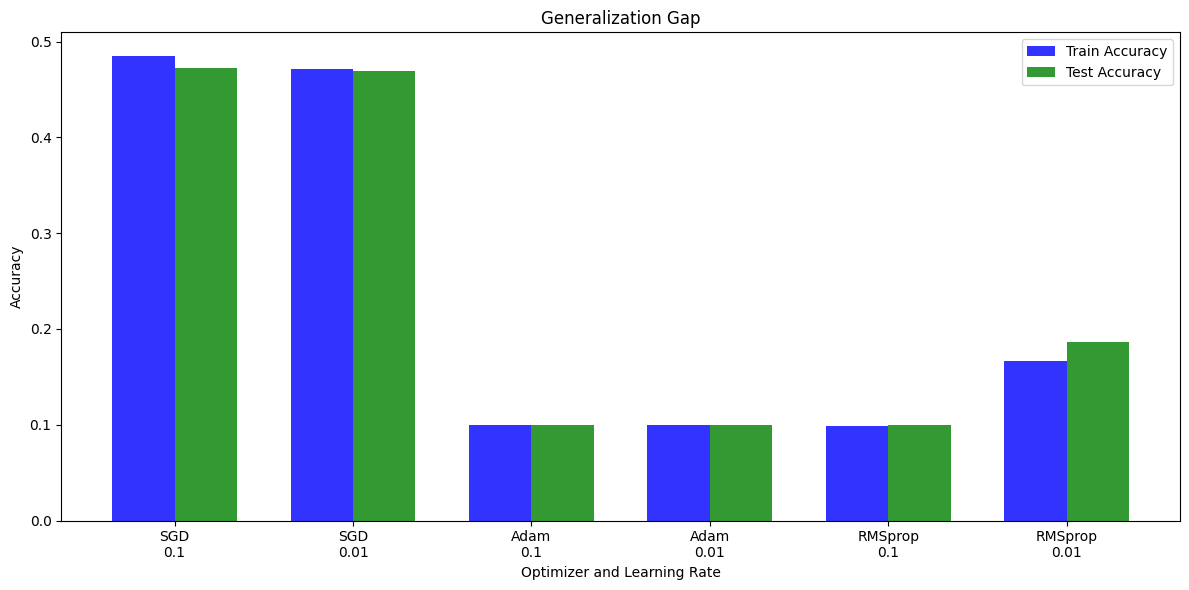

In [17]:
# Plot the generalization gap
plt.figure(figsize=(12, 6))
x = range(len(optimizers_names))
bar_width = 0.35
opacity = 0.8

plt.bar(x, train_accuracies, bar_width, alpha=opacity, color='b', label='Train Accuracy')
plt.bar([i + bar_width for i in x], test_accuracies, bar_width, alpha=opacity, color='g', label='Test Accuracy')

plt.xlabel('Optimizer and Learning Rate')
plt.ylabel('Accuracy')
plt.title('Generalization Gap')
plt.xticks([i + bar_width/2 for i in x], [f"{opt}\n{lr}" for opt, lr in zip(optimizers_names, learning_rates_list)])
plt.legend()
plt.tight_layout()
plt.show()